In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection

plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rc('axes', axisbelow=True)


In [2]:
np.random.seed(1)

In [3]:
# Imagine you have three node-aligned snapshots of a network
G = nx.karate_club_graph()
pos = nx.spring_layout(G) # assuming common node location

# A few examples of working with gaussian_kde

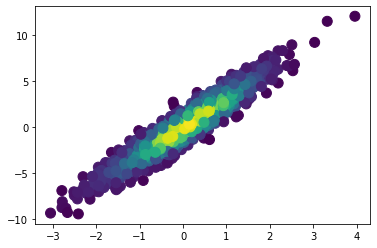

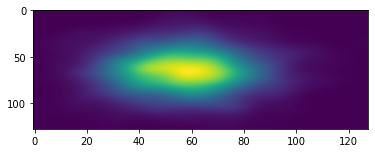

In [4]:
import scipy.stats as stats
from scipy.stats import gaussian_kde

# Generate fake data
x = np.random.normal(size=1000)
y = x * 3 + np.random.normal(size=1000)

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.show()

rvs = np.append(stats.norm.rvs(loc=2,scale=1,size=(2000,1)),
                stats.norm.rvs(loc=0,scale=3,size=(2000,1)),
                axis=1)

kde = gaussian_kde(rvs.T)

# Regular grid to evaluate kde upon
x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(128,128)

fig, ax = plt.subplots()
ax.imshow(z,aspect=x_flat.ptp()/y_flat.ptp())
plt.show()

# Now let's try to plot our karate club

In [5]:
x = np.array(list(pos.values()))[:,0]
y = np.array(list(pos.values()))[:,1]

xy = np.vstack([x,y])

# x_flat = np.linspace(-1,1,201)
# y_flat = np.linspace(-1,1,201)
x_flat = np.r_[x.min()-0.3:x.max()+0.3:128j]
y_flat = np.r_[y.min()-0.2:y.max()+0.2:128j]

xr,yr = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(xr.reshape(-1,1),yr.reshape(-1,1),axis=1)

zz = gaussian_kde(xy)(grid_coords.T)
zz = zz.reshape(128,128)

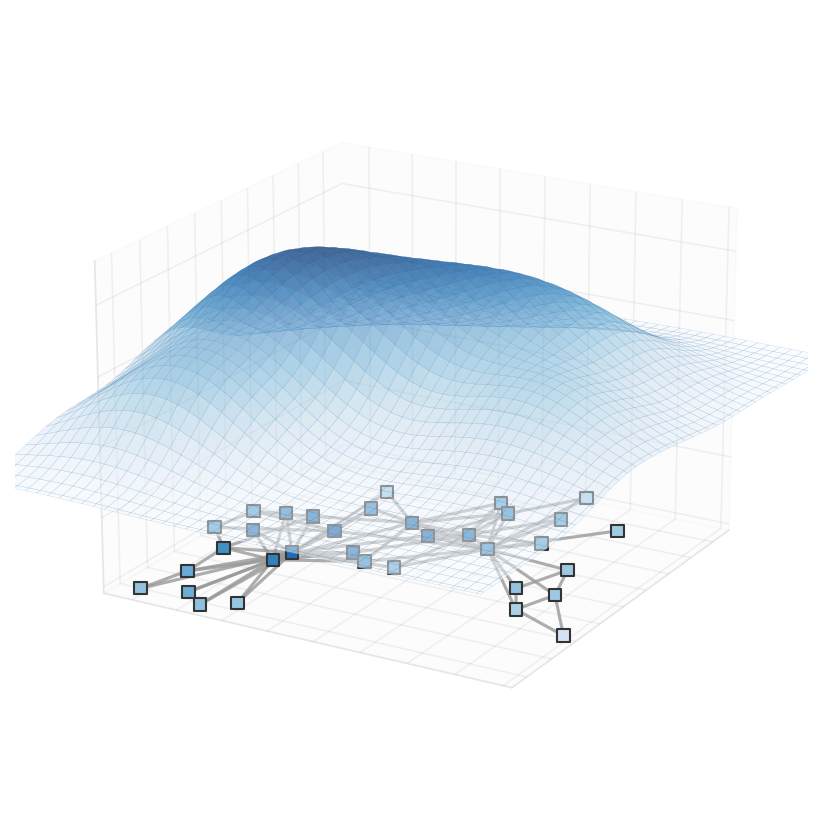

In [7]:
fig, ax = plt.subplots(1,1,figsize=(9,7),dpi=150,subplot_kw={'projection':'3d'})

###### Plot the surface
bump = 1.0
ax.plot_surface(xr,yr,zz+bump,rstride=3, cstride=3, alpha=0.5,
                linewidths=0.1, edgecolor='steelblue', cmap='Blues')


###### Plot the network
xs = list(list(zip(*list(pos.values())))[0])
ys = list(list(zip(*list(pos.values())))[1])

gi = 0
zs = [gi]*len(xs) # set a common z-position of the nodes 

# add within-layer edges 
lines3d = [(list(pos[i])+[gi],list(pos[j])+[gi]) for i,j in G.edges()]
line_collection = Line3DCollection(lines3d, zorder=gi-1, color='.6', alpha=0.8)
ax.add_collection3d(line_collection)

# now add nodes
z = gaussian_kde(xy)(xy) # this will color the nodes in the same way the surface is colored
ax.scatter(xs, ys, zs, c=z, s=35, edgecolors='.2', cmap='Blues', vmin=0,
           vmax=zz.max()+0.2, marker='s', alpha=1, zorder=gi+1)

# perspective parameters -- angle rotates the plot swiveling around the z axis
angle = 30
# height angle is how high you're looing at it from
height_angle = 20
ax.view_init(height_angle, angle)
# dist is how far away you're looking at this from
ax.dist = 11

# the limits of the plot might need to be fiddled with
ax.set_zlim(-0.0, zz.max()+bump+bump/5)
ax.set_xlim(np.array(list(pos.values()))[:,0].min(), np.array(list(pos.values()))[:,0].max())
ax.set_ylim(np.array(list(pos.values()))[:,1].min(), np.array(list(pos.values()))[:,1].max())

# ~aesthetics~
ax.xaxis.set_pane_color((0,0,0,0.01))
ax.yaxis.set_pane_color((0,0,0,0.01))
ax.zaxis.set_pane_color((0,0,0,0.01))
ax.xaxis._axinfo["grid"]['color'] = (0,0,0,0.05)
ax.yaxis._axinfo["grid"]['color'] = (0,0,0,0.05)
ax.zaxis._axinfo["grid"]['color'] = (0,0,0,0.05)
ax.w_xaxis.line.set_color('.9')
ax.w_yaxis.line.set_color('.9')
ax.w_zaxis.line.set_color('.9')
ax.tick_params(axis='both', which='major', color='none', length=0, width=0,
                  labelbottom=False, labelleft=False)

plt.savefig('hack.png',dpi=600,bbox_inches='tight')
plt.show()